# EDA

In [2]:
import pandas as pd
import numpy as np
import datetime

#경고무시
import warnings
warnings.filterwarnings(action='ignore') 

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
# 파일불러오기
df = pd.read_csv('./cleand preprocessed.csv')
pd.set_option('display.max_columns', 35)
df.head(3)

,구분,악궁구조,나이,성별,비뚠니,1년이내스케일링,사랑니,시린니,구취,치아흔들림,흡연,탄산음료섭취,"잇몸부종,통증",양치시간(분),키(cm),몸무게(kg),하루양치질(회),전체회차,진행된회차,추천칫솔,추천치약,진단년,진단월,진단일,진단시,나쁜습관,바뀔 수 없는 구강구조,치아 상황
0,0,1,22,0,0,1,0,1,0,0,0,0,1,2,0,0,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,10,0,0,2
1,0,1,22,0,0,1,0,0,0,0,0,0,0,2,0,0,2,1,1,클린디 기능모 칫솔,클린디 살짝 치약 100g 잇몸,2022,5,2,10,0,0,0
2,0,1,33,1,0,0,0,1,0,1,0,0,1,2,0,0,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,9,0,0,3


* dummy 변수 설명

'구분' : 비회원-0, 회원-1  
'악궁구조' : 좁은구강구조-0, 보통구강구조-1, 넓은구강구조-2  
'성별' : 남성-0, 여성-1

'비뚠니' : yes-1, no-0  
'1년이내스케일링' : yes-1, no-0  
'사랑니' : yes-1, no-0  
'시린니' : yes-1, no-0  
'구취' : yes-1, no-0   
'치아흔들림' : yes-1, no-0  
'흡연' : yes-1, no-0  
'탄산음료섭취' : yes-1, no-0  
'잇몸부종,통증' : yes-1, no-0


* 'y' 하나당 각 1점으로 더해서 점수컬럼생성

1. 흡연, 탄산음료섭취, 양치시간 1분이하, 1회이하 -> 나쁜 습관
2. 사랑니, 비뚠이 -> 바뀔 수 없는 구강구조 
3. 구취, 치아 흔들림, 시린니, 잇몸부종 => 치아 상황 

## 1. 결측치확인


In [4]:
df.isnull().sum()  #결측치 없음

구분              0
악궁구조            0
나이              0
성별              0
비뚠니             0
1년이내스케일링        0
사랑니             0
시린니             0
구취              0
치아흔들림           0
흡연              0
탄산음료섭취          0
잇몸부종,통증         0
양치시간(분)         0
키(cm)           0
몸무게(kg)         0
하루양치질(회)        0
전체회차            0
진행된회차           0
추천칫솔            0
추천치약            0
진단년             0
진단월             0
진단일             0
진단시             0
나쁜습관            0
바뀔 수 없는 구강구조    0
치아 상황           0
dtype: int64

## 2. 데이터 분포 확인

### 2-1 '구분', '악궁구조', '나이', '성별', '비뚠니', '1년이내스케일링', '사랑니'  변수 확인

<AxesSubplot:xlabel='사랑니', ylabel='count'>

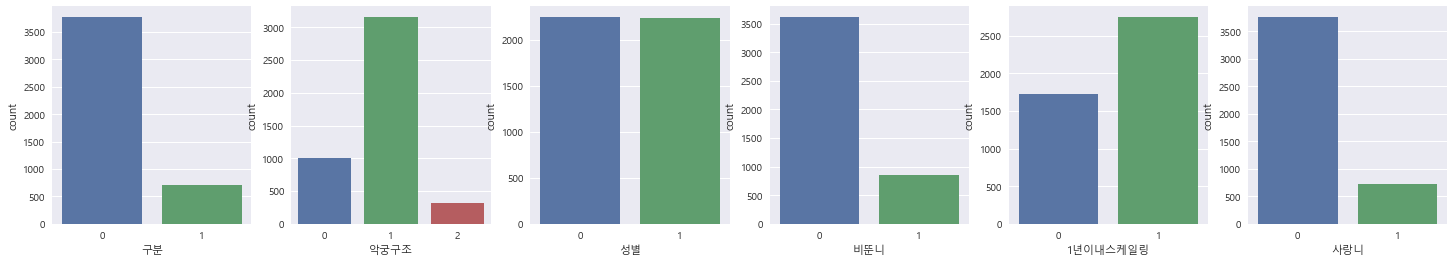

In [6]:
fig, ax = plt.subplots(ncols=6, figsize=(25,4))
sns.countplot(df['구분'], ax=ax[0])
sns.countplot(df['악궁구조'], ax=ax[1])
sns.countplot(df['성별'], ax=ax[2])
sns.countplot(df['비뚠니'], ax=ax[3])
sns.countplot(df['1년이내스케일링'], ax=ax[4])
sns.countplot(df['사랑니'], ax=ax[5])

* 회원 보다 비회원구매가 압도적으로 많음 -> 회원가입 유도 전략이 필요해 보임.
* 악궁구조는 보통 > 좁은 > 넓은 구강구조 순으로 많음. -> 칫솔 개발시 참고 할 만할듯함.
* 성별은 남여 비슷한 비율로 나타남.
* 비뚠니는 없는 사람이 있는사람보다 약 4배 많음.
* 1년 이내 스케일링받은 사람이 안받은 사람보다 약 2배 많음. 치아관리에 기본적으로 관심이 있고 액션이 있는 사람뿐만 아니라 관심을 가지기 시작하는 사람의 유입도 적지 않음.
* 사랑니가 없는 사람이 있는사람보다 6배정도 많음.  

### 2-2 '시린니', '구취', '치아흔들림', '흡연', '탄산음료섭취', '잇몸부종,통증' 변수확인

<AxesSubplot:xlabel='잇몸부종,통증', ylabel='count'>

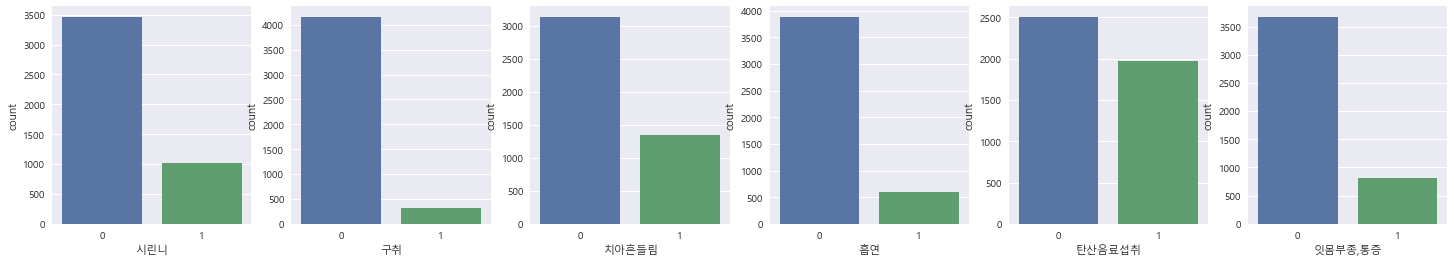

In [7]:
fig, ax = plt.subplots(ncols=6, figsize=(25,4))
sns.countplot(df['시린니'], ax=ax[0])
sns.countplot(df['구취'], ax=ax[1])
sns.countplot(df['치아흔들림'], ax=ax[2])
sns.countplot(df['흡연'], ax=ax[3])
sns.countplot(df['탄산음료섭취'], ax=ax[4])
sns.countplot(df['잇몸부종,통증'], ax=ax[5])

* y축을 확인해 봤을 때, 치아흔들림 > 시린니 > 잇몸부종,통증 > 구치 순으로 증상을 가진 사람이 많았음.
* 흡연은 안하는사람이 약 8배 많음.
* 탄산음료는 마시는사람이 안마시는 사람보다 약간 더 많음.

### 2-3 '양치시간', '키', '몸무게', '하루양치질', '전체회차', '진행된회차' 변수 확인

<AxesSubplot:xlabel='진행된회차', ylabel='count'>

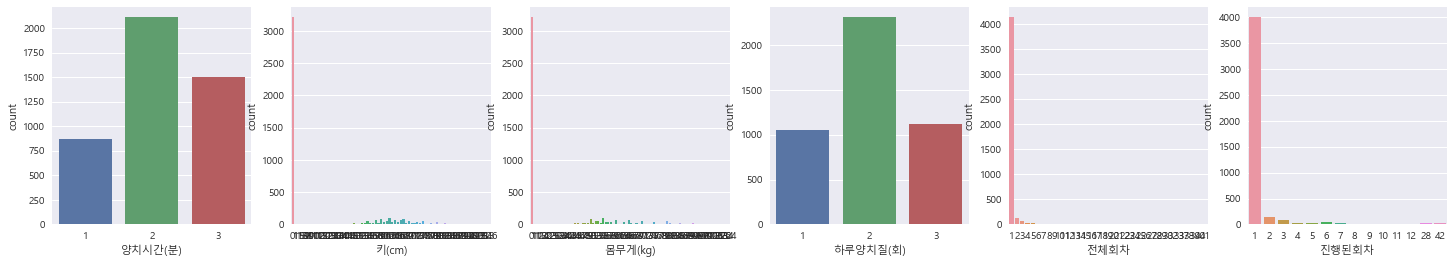

In [8]:
fig, ax = plt.subplots(ncols=6, figsize=(25,4))
sns.countplot(df['양치시간(분)'], ax=ax[0])
sns.countplot(df['키(cm)'], ax=ax[1])
sns.countplot(df['몸무게(kg)'], ax=ax[2])
sns.countplot(df['하루양치질(회)'], ax=ax[3])
sns.countplot(df['전체회차'], ax=ax[4])
sns.countplot(df['진행된회차'], ax=ax[5])

 * 양치시간은 2분 > 3분 > 1분 순으로 많음.
 * 키와 몸무게는 측정되지않은 값인 0이 많아 0을 제거 하고 다시 그려야함.  이후 모델링에서는 정보가 부족해서 두 변수 제외할 예정.
 * 하루양치질 횟수는 2회 > 3회 > 1회 순으로 많음.  
 * 전체회차, 진행된 회차는 박스플롯으로 이상치 확인 후 처리 예정.

### 2-4 '추천칫솔', ''추천치약' 변수 확인

<AxesSubplot:xlabel='추천치약', ylabel='count'>

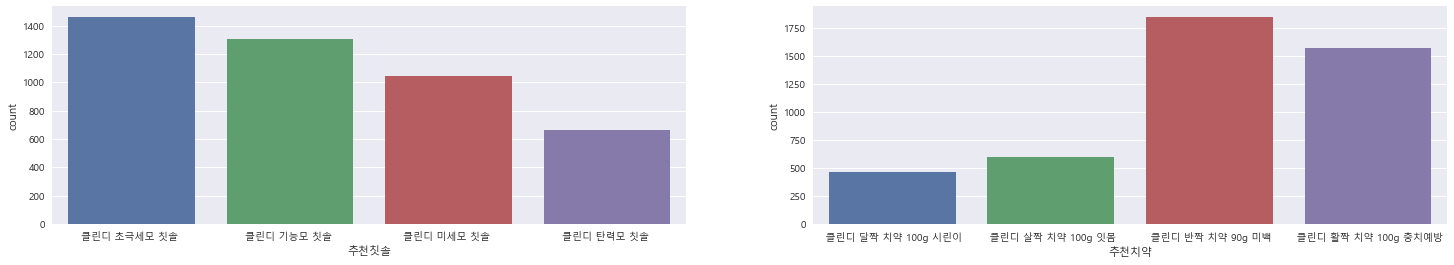

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.countplot(df['추천칫솔'], ax=ax[0])
sns.countplot(df['추천치약'], ax=ax[1])


* 칫솔은 초극세모 > 기능모 > 미세모 > 탄력모 순으로 추천이 많이 되었음.
* 치약은 달짝 > 살짝 > 반짝 > 활짝 순으로 추천이 많이 되었음.

### 2-5 진단한 연, 월, 일, 시 변수 확인

<AxesSubplot:xlabel='진단시', ylabel='count'>

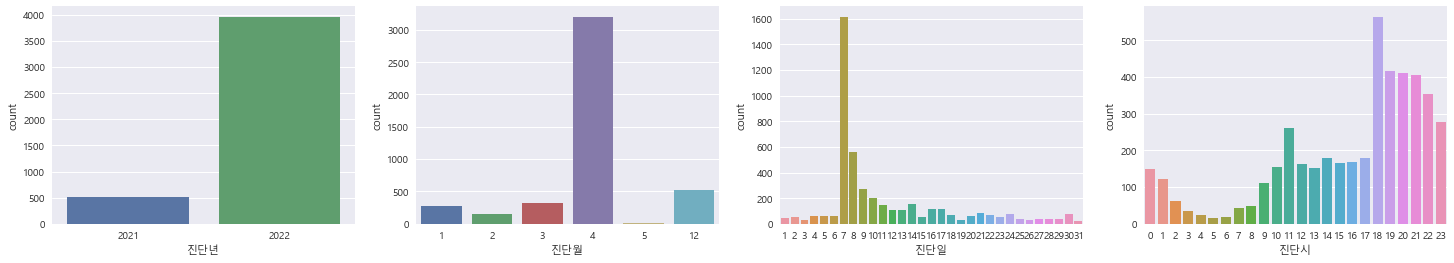

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(25,4))
sns.countplot(df['진단년'], ax=ax[0])
sns.countplot(df['진단월'], ax=ax[1])
sns.countplot(df['진단일'], ax=ax[2])
sns.countplot(df['진단시'], ax=ax[3])

* 2021년보다 2022년에 유입이 많이 되었음.
* 유입이 4월7일 급증 하고 그 후 감소해서 4월7일 이전과 비슷한 모습을 보임. 4월7일 유튜브 크리에이터와 콜라보했던 영상이 큰 영향을 미친것으로 보임.  (4.7 네이버 데이터랩기준 검색 100회)
* 저녁,밤시간대인 18시-23시에 유입이 많이 되었음.  

### 2-6 '나쁜습관', '바뀔수 없는 구강구조', '치아상황' 변수 확인

<AxesSubplot:xlabel='치아 상황', ylabel='count'>

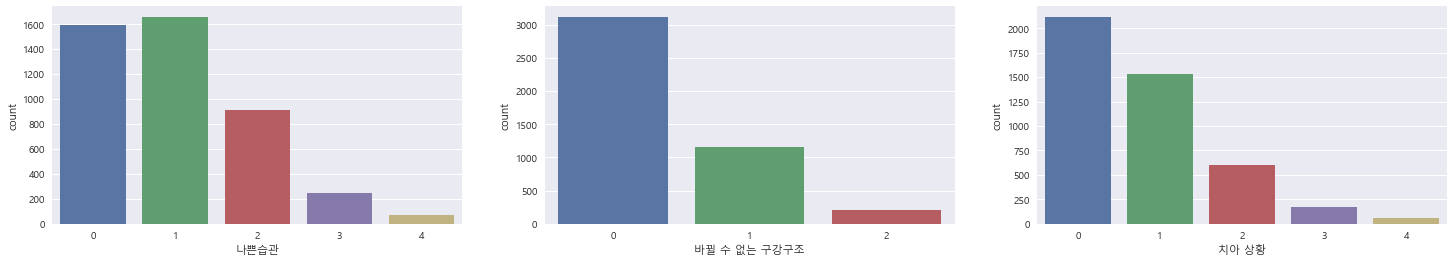

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(25,4))
sns.countplot(df['나쁜습관'], ax=ax[0])
sns.countplot(df['바뀔 수 없는 구강구조'], ax=ax[1])
sns.countplot(df['치아 상황'], ax=ax[2])

### 2-7 '나이' 변수 확인

<AxesSubplot:xlabel='나이', ylabel='count'>

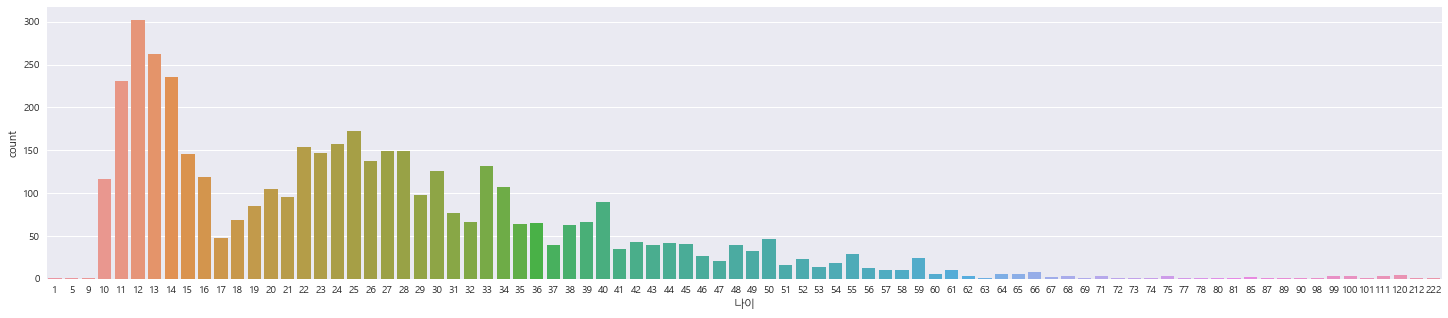

In [12]:
plt.figure(figsize = (25,5))
sns.countplot(df['나이'])